In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
from sklearn.linear_model import LogisticRegression

In [2]:
data_f = pd.read_csv('dataset.csv')

In [3]:
data_fNP = np.array(data_f)

In [4]:
data_f.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Limpieza

In [ ]:
datos_seleccionados = data_f.iloc[:,1:12] #seleccionando, (quitando clolumna id)

In [ ]:
datos_seleccionados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
datos_seleccionados.isnull().values.any()
# True = valores vacios

True

In [ ]:
datos_seleccionados.isnull().sum() #Tenemos 201 NaN en BMI

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data_f.groupby("smoking_status").count() #Podemos ver 1522 unknowns en si fumaban o no

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
Unknown,1544,1544,1544,1544,1544,1544,1544,1544,1544,1483,1544
formerly smoked,885,885,885,885,885,885,885,885,885,837,885
never smoked,1892,1892,1892,1892,1892,1892,1892,1892,1892,1852,1892
smokes,789,789,789,789,789,789,789,789,789,737,789


Quitando los NAN

In [ ]:
datosSIN_NAN = datos_seleccionados.dropna(axis = 0)

In [ ]:
datosSIN_NAN.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
datosSIN_NAN.isnull().sum() #Comprobando que no tengan NAN

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
datosSIN_NAN.isnull().values.any() #Segunda comprobacion 

False

In [ ]:
datosSIN_NAN.groupby("smoking_status").count() #podemos ver 1483 unknows, decidimos borrarlos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
Unknown,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
formerly smoked,837,837,837,837,837,837,837,837,837,837
never smoked,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
smokes,737,737,737,737,737,737,737,737,737,737


COntinuando proceso de limpieza

In [ ]:
CL_data_F = pd.read_excel("Datos_sin_nan.xlsx")

In [ ]:
CL_data_F.groupby("smoking_status").count() #Ya tenemos los datos limpios, pero falta trabajo por hacer

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
formerly smoked,837,837,837,837,837,837,837,837,837,837
never smoked,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
smokes,737,737,737,737,737,737,737,737,737,737


Estadistica

In [ ]:
datos_Listos = pd.read_excel("ValoresBinariosSS.xlsx")
np_datos = np.array(datos_Listos)

In [ ]:
datos_Listos.head()

,female,male,age,hypertension,heart_disease,ever_married,WT_PR,WT_SE,WT_GOVJ,WT Children,WT_NEverW,ResTy Ur,ResTy Ru,avg_glucose_level,bmi,Smokes Never,Smokes For,Smokes,stroke
0,0,1,0.973768,0,1,1,1,0,0,0,0,1,0,2.523621,0.864982,0,1,0,1
1,0,1,1.663479,0,1,1,1,0,0,0,0,0,1,-0.050358,0.302945,1,0,0,1
2,1,0,0.018784,0,0,1,1,0,0,0,0,1,0,1.318923,0.563401,0,0,1,1
3,1,0,1.610424,1,0,1,0,1,0,0,0,0,1,1.379514,-0.862253,1,0,0,1
4,0,1,1.716533,0,0,1,1,0,0,0,0,1,0,1.632992,-0.176842,0,1,0,1


In [ ]:
datos_Listos.var()

female               0.238152
male                 0.238152
age                  1.000292
hypertension         0.104938
heart_disease        0.056530
ever_married         0.183174
WT_PR                0.229778
WT_SE                0.149932
WT_GOVJ              0.127558
WT Children          0.019460
WT_NEverW            0.004071
ResTy Ur             0.249986
ResTy Ru             0.249986
avg_glucose_level    1.000292
bmi                  1.000292
Smokes Never         0.248426
Smokes For           0.184676
Smokes               0.168892
stroke               0.049794
dtype: float64

In [ ]:
datos_Listos.describe()

,female,male,age,hypertension,heart_disease,ever_married,WT_PR,WT_SE,WT_GOVJ,WT Children,WT_NEverW,ResTy Ur,ResTy Ru,avg_glucose_level,bmi,Smokes Never,Smokes For,Smokes,stroke
count,3426.000000,3426.000000,3.426000e+03,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.426000e+03,3.426000e+03,3426.000000,3426.000000,3426.000000,3426.000000
mean,0.609165,0.390835,-2.680811e-16,0.119089,0.060128,0.758611,0.642440,0.183596,0.150029,0.019848,0.004086,0.509340,0.490660,-6.740408e-17,-4.384506e-17,0.540572,0.244308,0.215120,0.052539
std,0.488009,0.488009,1.000146e+00,0.323941,0.237759,0.427988,0.479352,0.387211,0.357152,0.139499,0.063804,0.499986,0.499986,1.000146e+00,1.000146e+00,0.498424,0.429739,0.410965,0.223145
min,0.000000,0.000000,-2.050347e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.115424e+00,-2.575781e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.770354e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.517111e-01,-6.840465e-01,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,7.183904e-02,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.346549e-01,-1.631342e-01,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,7.615496e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.653286e-01,5.222767e-01,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.769588e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.426202e+00,8.459336e+00,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


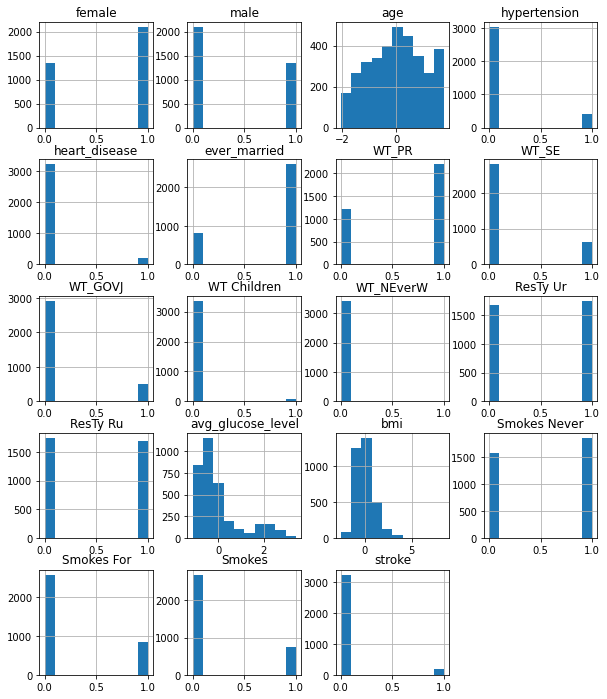

In [ ]:
# Histograma
datos_Listos.columns[0]
fig = plt.figure(figsize = (10,12))
ax = fig.gca()
datos_Listos.hist(ax = ax)
plt.show()

In [ ]:
datos_Listos = datos_Listos.dropna()
datos_Listos.columns
X = datos_Listos[['female',	'male',	'age',	'hypertension',	'heart_disease',	'ever_married',	'WT_PR',	'WT_SE',	'WT_GOVJ',	'WT Children',
             'WT_NEverW',	'ResTy Ur',	'ResTy Ru',	'avg_glucose_level',	'bmi',	'Smokes Never',	'Smokes For',	'Smokes']].values

y = datos_Listos['stroke'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
modelo_regresion = LinearRegression()

modelo_regresion.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
 from sklearn.linear_model import LinearRegression
x_columns = ['female',	'male',	'age',	'hypertension',	'heart_disease',	'ever_married',	'WT_PR',	'WT_SE',	'WT_GOVJ',	'WT Children',
             'WT_NEverW',	'ResTy Ur',	'ResTy Ru',	'avg_glucose_level',	'bmi',	'Smokes Never',	'Smokes For',	'Smokes']
coeff_df = pd.DataFrame(modelo_regresion.coef_)
coeff_df 

,0
0,-1.871888e+12
1,-1.871888e+12
2,5.220133e-02
3,5.013924e-02
4,4.301782e-02
5,-2.937434e-02
6,2.405752e+10
7,2.405752e+10
8,2.405752e+10
9,2.405752e+10


In [ ]:
y_pred = modelo_regresion.predict(X_test)

In [ ]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred}) 

muestra_validacion = validacion.head(5) 

muestra_validacion 

,Actual,Predicción,Diferencia
0,0,0.061279,-0.061279
1,0,0.099609,-0.099609
2,0,0.036621,-0.036621
3,0,0.090332,-0.090332
4,0,0.114990,-0.114990


In [ ]:
validacion["Diferencia"].describe()

count    1028.000000
mean        0.008248
std         0.222162
min        -0.229980
25%        -0.081055
50%        -0.027222
75%         0.007874
max         0.985107
Name: Diferencia, dtype: float64

In [ ]:
r2_score(y_test, y_pred) 

0.08730169700097068

In [ ]:
models = pd.DataFrame(columns=["Model","Accuracy Score"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"LogisticRegression: {score}")

new_row={"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

LogisticRegression: 0.9426070038910506


In [ ]:


log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_columns = ['female',	'male',	'age',	'hypertension',	'heart_disease',	'ever_married',	'WT_PR',	'WT_SE',	'WT_GOVJ',	'WT Children',
             'WT_NEverW',	'ResTy Ur',	'ResTy Ru',	'avg_glucose_level',	'bmi',	'Smokes Never',	'Smokes For',	'Smokes']
coeff_df = pd.DataFrame(log_reg.coef_ )
coeff_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.054063,0.055208,1.376371,0.559454,0.232377,-0.086051,0.167042,-0.098131,0.003316,-0.056223,-0.014859,0.026309,-0.025164,0.222529,0.095184,-0.130757,-0.286757,0.41866


In [ ]:
coeff_df.to_excel("Coeficienesbien.xlsx")

In [ ]:
coeff_df = pd.DataFrame([modelo_regresion.coef_] , x_columns )
coeff_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
female,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
male,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
age,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
hypertension,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
heart_disease,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
ever_married,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
WT_PR,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
WT_SE,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
WT_GOVJ,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
WT Children,-1.871888e+12,-1.871888e+12,0.052201,0.050139,0.043018,-0.029374,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,2.405752e+10,3.796784e+10,3.796784e+10,0.01728,-0.001604,-1.480134e+11,-1.480134e+11,-1.480134e+11
